# IRIS FLOWER CLASSIFICATION task 1
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [84]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [92]:
data=pd.read_csv(r"C:\Users\Ashwi\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring data

In [93]:
data.shape

(150, 6)

In [94]:
data.size

900

In [95]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Obtaining Description/Summary Dataframe

In [96]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Viewing unique categories/values

In [98]:
unique=data.Species.unique()
print(len(unique))
print(unique)

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Taking required numnerical data into another dataframe

In [99]:
data_df=data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]  #choosing ftures having numerical data
data_df.sample(5) #viewing random 5 records from dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
1,4.9,3.0,1.4,0.2
60,5.0,2.0,3.5,1.0
108,6.7,2.5,5.8,1.8


# Pairplot

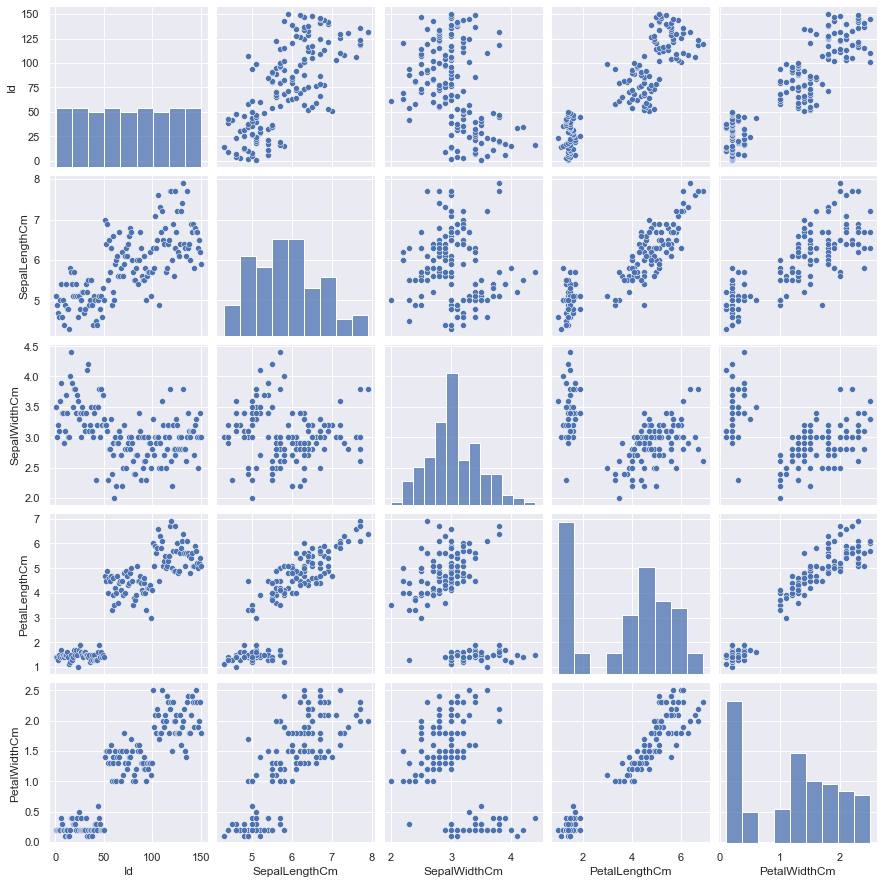

In [100]:
sns.pairplot(data)

C:\Users\Ashwi\AppData\Local\Temp/ipykernel_22908/2468181617.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.df2=data.drop(['Id'],axis=1)
C:\Users\Ashwi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

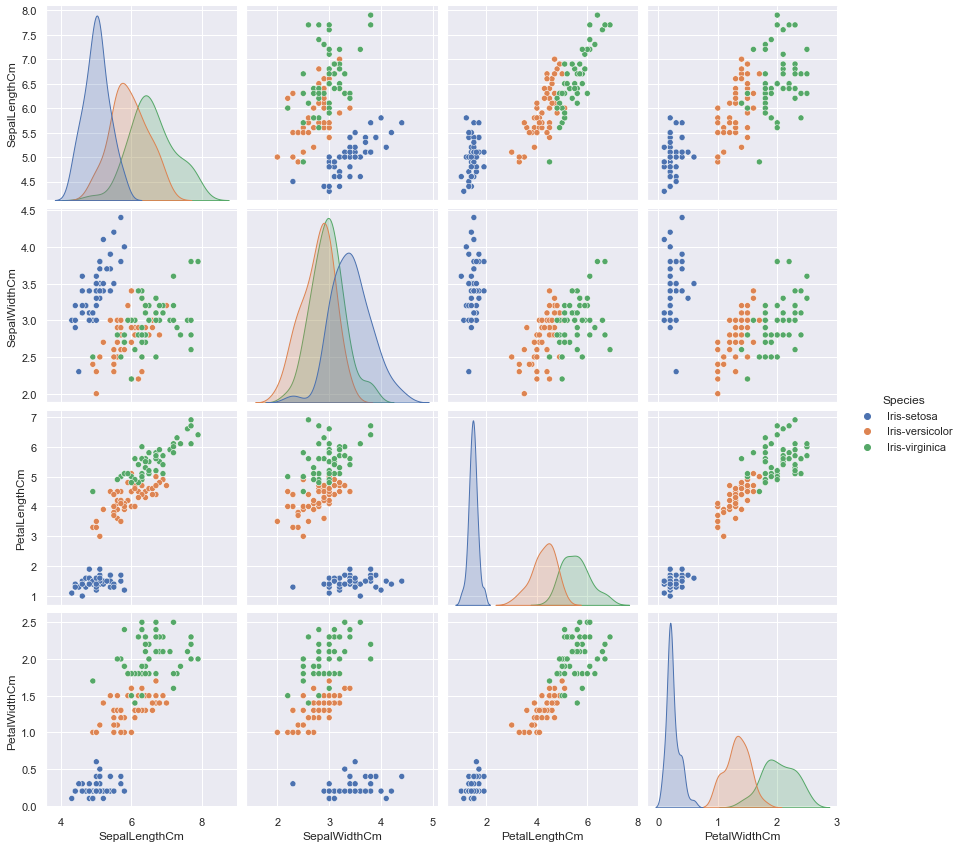

In [101]:
data.df2=data.drop(['Id'],axis=1)
plt.figure(figsize=(10,10))
sns.pairplot(data.df2,hue='Species',size=3)

 From the above pairplotit shows that features of iris-Setosa are distinguishable from features of other categories

# Heat Map
Heat Map allows you to visualize how storngy/weakly or positively/negatively the feature are correlated with light to dark colour & value of correlation coefficients

<AxesSubplot:>

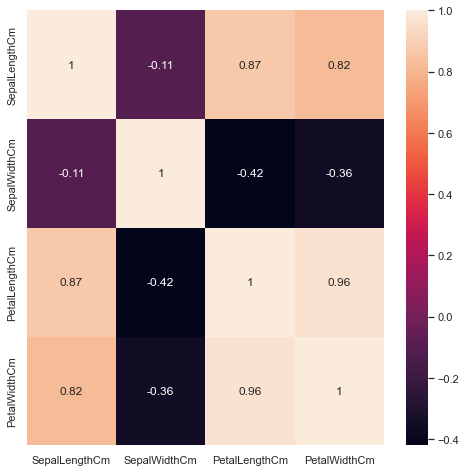

In [103]:
plt.figure(figsize=(8,8))
corre=data.df2.corr()
sns.heatmap(corre,annot=True) #to visualize the stronge/weak correlation exists & annot=True to show that correlation value 


In [104]:
sns.FacetCrid(data,true='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()


sns.FacetCrid(data,true='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

AttributeError: module 'seaborn' has no attribute 'FacetCrid'

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

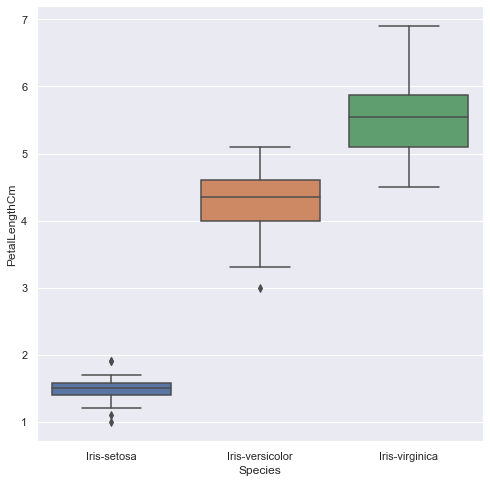

In [105]:
plt.figure(figsize=(8,8))
sns.boxplot(y='PetalLengthCm',x='Species',data=data.df2)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

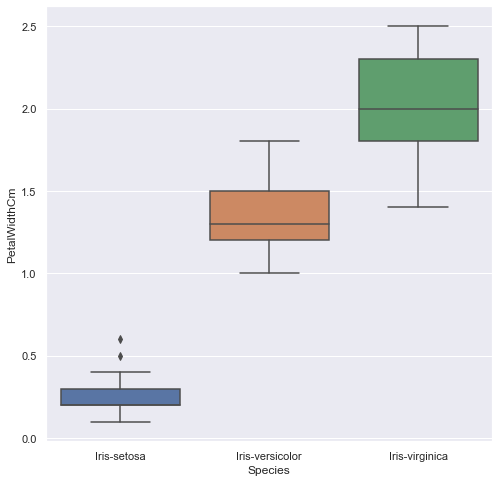

In [106]:
plt.figure(figsize=(8,8))
sns.boxplot(y='PetalWidthCm',x='Species',data=data.df2)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

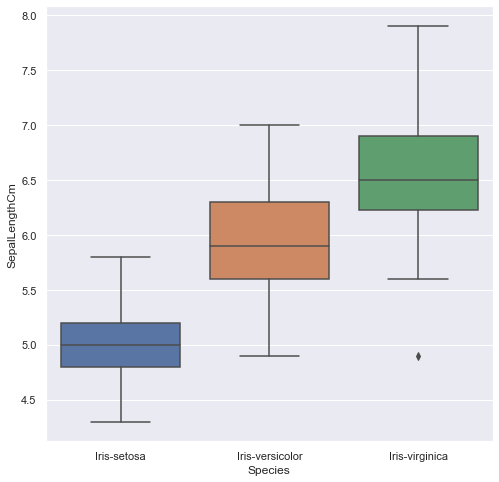

In [107]:
plt.figure(figsize=(8,8))
sns.boxplot(y='SepalLengthCm',x='Species',data=data.df2)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

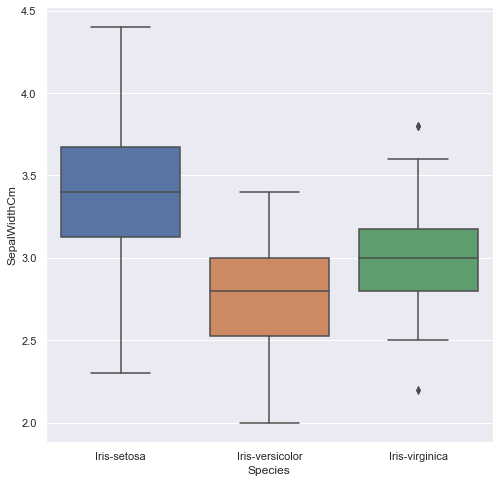

In [108]:
plt.figure(figsize=(8,8))
sns.boxplot(y='SepalWidthCm',x='Species',data=data.df2)

From the above plot we see that outlier present

# VIOLIN PLOT

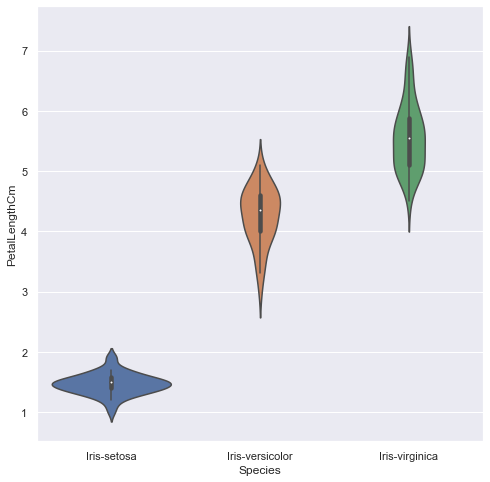

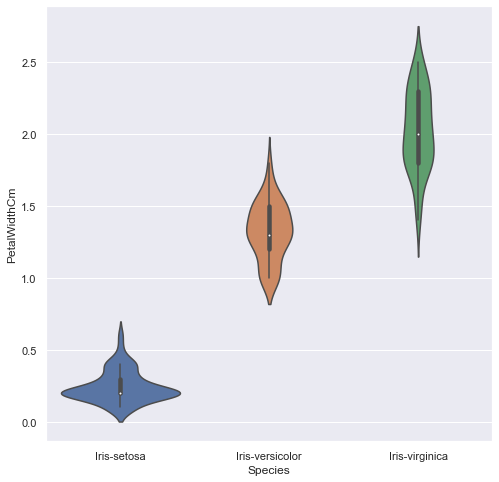

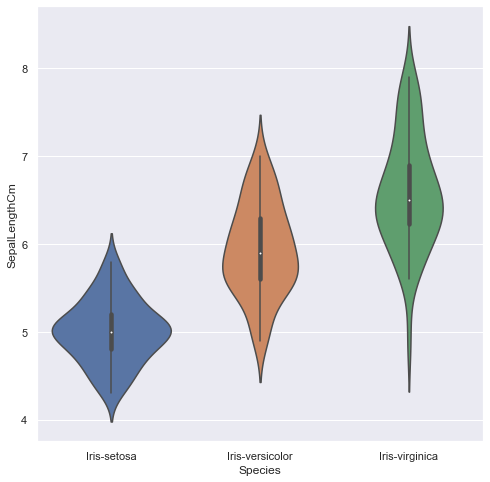

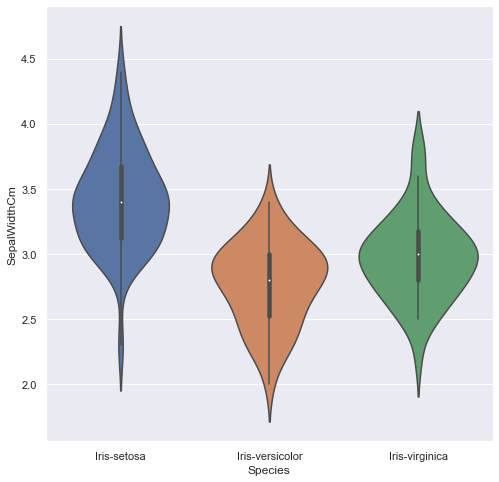

In [109]:
plt.figure(figsize=(8,8))
sns.violinplot(y='PetalLengthCm',x='Species',data=data.df2)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='PetalWidthCm',x='Species',data=data.df2)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='SepalLengthCm',x='Species',data=data.df2)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='SepalWidthCm',x='Species',data=data.df2)
plt.show()


# Splitting of data into train & test sets

In [110]:
x= data.df2.iloc[:, :-1].values
y= data.df2.iloc[:, -1].values

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0) #80-20 ratio

In [112]:
[len(x_train),len(x_test),len(y_train),len(y_test)]

[120, 30, 120, 30]

# Using K Means of Clusterring

C:\Users\Ashwi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


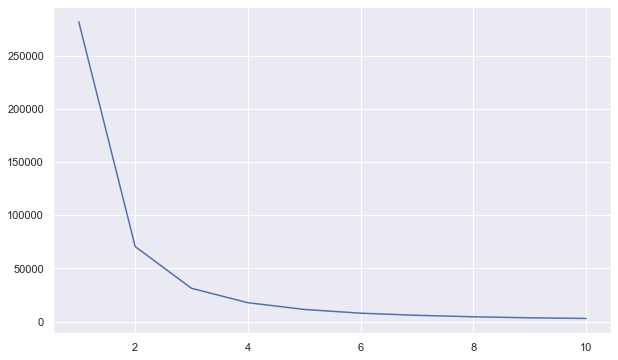

In [113]:
from sklearn.cluster import KMeans
css=[]
X=data.iloc[: , [0,1,2,3]].values
for i in range(1,11):
    Kmeans= KMeans(n_clusters = i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(X)
    css.append(Kmeans.inertia_)
    
plt.plot(range(1,11), css)
plt.show()

In [114]:
from sklearn.neighbors import KNeighborsClassifier

k=3
kclassifier=KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
kclassifier

KNeighborsClassifier(n_neighbors=3)

In [115]:
y_pred=kclassifier.predict(x_test)
compare_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare_df.sample(10)

,Actual,Predicted
21,Iris-versicolor,Iris-versicolor
5,Iris-virginica,Iris-virginica
24,Iris-virginica,Iris-virginica
18,Iris-setosa,Iris-setosa
11,Iris-versicolor,Iris-versicolor
14,Iris-versicolor,Iris-virginica
23,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa


In [116]:
cnt=0
index=[]
for i,j in zip(compare_df['Actual'],compare_df['Predicted']):
    if(i!=j):
        cnt+=1
        print(cnt)

1


# Evaluate K Classifier Model

In [118]:
from sklearn.metrics import accuracy_score
 
print("Train set Accuracy:",accuracy_score(y_train,kclassifier.predict(x_train)))
print("Train set Accuracy:",accuracy_score(y_test,y_pred))

Train set Accuracy: 0.95
Train set Accuracy: 0.9666666666666667


Confusion Matrix for the classifier

From the confusion matrix we get to know that there are some false positive present.

In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


# Classification Report

In [120]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Using SVM Approch
Building SVM Classifier

In [121]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(x_train,y_train)
y_pred2=svc_classifier.predict(x_test)
compare_df2 = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
compare_df2.sample(10)

,Actual,Predicted
10,Iris-virginica,Iris-virginica
20,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor
24,Iris-virginica,Iris-virginica
22,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
27,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
23,Iris-setosa,Iris-setosa
14,Iris-versicolor,Iris-virginica


In [122]:
cnt=0
index=[]
for i,j in zip(compare_df2['Actual'],compare_df2['Predicted']):
    if(i!=j):
        cnt+=1
        print(cnt)

1


In [123]:
print("Train set Accuracy:",accuracy_score(y_train,svc_classifier.predict(x_train)))
print("Train set Accuracy:",accuracy_score(y_test,y_pred2))

Train set Accuracy: 0.9583333333333334
Train set Accuracy: 1.0


In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred2))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [125]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred2)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Conclusion:
# SVM performed brtter than KNN Classifier.